In [9]:
import makeitseg2, obspy
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
filename = 'shot1700.segy'
newfileName = "shot1700.dat"
makeitseg2.convert(filename, newfileName)

file contains an invalid TRACE SORT method, set a valid TRACE SORT method
file contains an invalid unit, set a valid unit


In [11]:
strm = obspy.read(filename)
strm2 = obspy.read(newfileName)
data_segy = []
data_seg2 = []
for tr1, tr2 in zip(strm, strm2):
    tr1_np = np.array(tr1.data)
    tr1_np = 10*tr1_np/np.max(tr1_np)
    data_segy.append(tr1_np + float(tr1.stats.segy.trace_header.group_coordinate_x))
    tr2_np = np.array(tr2.data)
    tr2_np = 10*tr2_np/np.max(tr2_np)
    data_seg2.append(tr2_np + float(tr2.stats.seg2.RECEIVER_LOCATION))


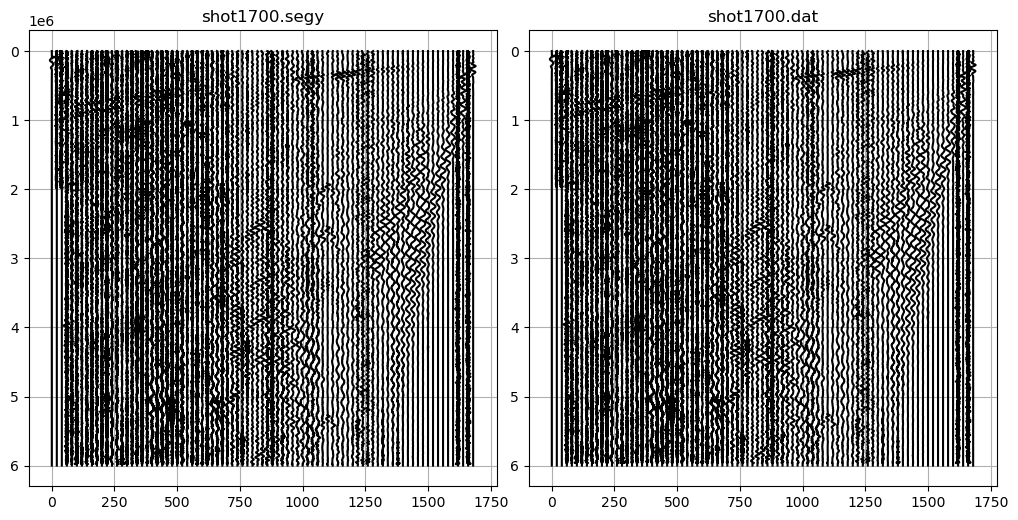

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5), dpi=100)
ax[0].grid(True)
ax[1].grid(True)
ts = float(strm[0].stats.segy.trace_header.sample_interval_in_ms_for_this_trace)
e = len(strm[0].data)
t_y = np.arange(0, ts*(e), ts)
for tr in data_segy:
    ax[0].plot(tr,t_y, 'k')
ax[0].invert_yaxis()
ax[0].set_title(filename)

ts = float(strm2[0].stats.seg2.SAMPLE_INTERVAL)
e = len(strm2[0].data)
t_2 = np.arange(0, ts*(e), ts)
for tr in data_seg2:    
    ax[1].plot(tr,t_2, 'k')
ax[1].invert_yaxis()
ax[1].set_title(newfileName)
plt.tight_layout(pad=0)